Checking that metric 2 and 3 are doing the right thing.

To run this notebook, pickle files for each year of interest must be created in the 'makePickles201905' notebook.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, places, viz_tools, visualisations, bloomdrivers
import xarray as xr
import pandas as pd
import pickle
import os

%matplotlib inline

### To recreate this notebook at a different location, follow these instructions: 
Change only the values in the following cell. If you change the startyear and endyear, the xticks (years) in the plots will need to be adjusted accordingly. If you did not make pickle files for 201812 bloom timing variables, remove the cell that loads that data *'Load bloom timing variables for 201812 run'*, as well as a section from the cell that plots bloom timing; *'Bloom Date'*.

In [63]:
# The path to the directory where the pickle files are stored:
savedir='/ocean/aisabell/MEOPAR/extracted_files'

# Change 'S3' to the location of interest
loc='QU39'
# Note: x and y limits in the following cell (map of location) may need to be adjusted

# What is the start year and end year+1 of the time range of interest?
startyear=2007
endyear=2021 # does NOT include this value

# Note: pickle file with 'non-location specific variables' only need to be created for each year, not for each location
# Note: xticks (years) in the plots will need to be changed
# Note: 201812 bloom timing variable load and plotting will also need to be removed

1.1363636363636362

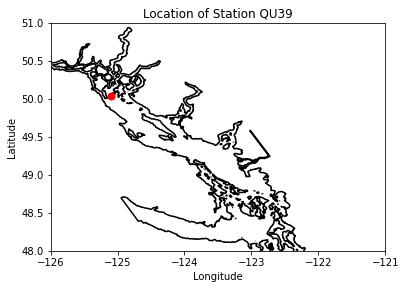

In [64]:
modver='201905'
# lat and lon information for place:
lon,lat=places.PLACES[loc]['lon lat']
# get place information on SalishSeaCast grid:
ij,ii=places.PLACES[loc]['NEMO grid ji']
jw,iw=places.PLACES[loc]['GEM2.5 grid ji']

fig, ax = plt.subplots(1,1,figsize = (6,6))
with xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc') as mesh:
    ax.contour(mesh.nav_lon,mesh.nav_lat,mesh.tmask.isel(t=0,z=0),[0.1,],colors='k')
    tmask=np.array(mesh.tmask)
    gdept_1d=np.array(mesh.gdept_1d)
    e3t_0=np.array(mesh.e3t_0)
ax.plot(lon, lat, '.', markersize=14, color='red')
ax.set_ylim(48,51)
ax.set_xlim(-126,-121)
ax.set_title('Location of Station %s'%loc)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
viz_tools.set_aspect(ax,coords='map')

### Strait of Georgia Region:

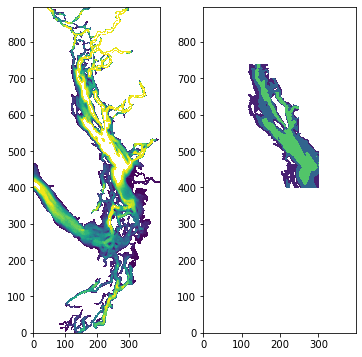

In [65]:
# define sog region:
fig, ax = plt.subplots(1,2,figsize = (6,6))
with xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as bathy:
    bath=np.array(bathy.Bathymetry)
ax[0].contourf(bath,np.arange(0,250,10))
viz_tools.set_aspect(ax[0],coords='grid')
sogmask=np.copy(tmask[:,:,:,:])
sogmask[:,:,740:,:]=0
sogmask[:,:,700:,170:]=0
sogmask[:,:,550:,250:]=0
sogmask[:,:,:,302:]=0
sogmask[:,:,:400,:]=0
sogmask[:,:,:,:100]=0
#sogmask250[bath<250]=0
ax[1].contourf(np.ma.masked_where(sogmask[0,0,:,:]==0,bathy.Bathymetry),[0,100,250,550])

###  *** Stop and check, have you made pickle files for all the years? ***

### Combine separate year files into arrays:

In [66]:
# loop through years (for location specific drivers)

years=list()
windjan=list()
windfeb=list()
windmar=list()
solarjan=list()
solarfeb=list()
solarmar=list()
parjan=list()
parfeb=list()
parmar=list()
tempjan=list()
tempfeb=list()
tempmar=list()
saljan=list()
salfeb=list()
salmar=list()
zoojan=list()
zoofeb=list()
zoomar=list()
mesozoojan=list()
mesozoofeb=list()
mesozoomar=list()
microzoojan=list()
microzoofeb=list()
microzoomar=list()
intzoojan=list()
intzoofeb=list()
intzoomar=list()
intmesozoojan=list()
intmesozoofeb=list()
intmesozoomar=list()
intmicrozoojan=list()
intmicrozoofeb=list()
intmicrozoomar=list()
midno3jan=list()
midno3feb=list()
midno3mar=list()

for year in range(startyear,endyear):
    fname=f'JanToMarch_TimeSeries_{year}_{loc}_{modver}.pkl'
    savepath=os.path.join(savedir,fname)
    bio_time,diat_alld,no3_alld,flag_alld,cili_alld,microzoo_alld,mesozoo_alld,\
            intdiat,intphyto,spar,intmesoz,intmicroz,grid_time,temp,salinity,u_wind,v_wind,twind,\
            solar,no3_30to90m,sno3,sdiat,sflag,scili,intzoop,fracdiat,zoop_alld,sphyto,phyto_alld,\
            percdiat,wspeed,winddirec=pickle.load(open(savepath,'rb'))
    # put code that calculates drivers here
    wind=bloomdrivers.D1_3monthly_avg(twind,wspeed)
    solar=bloomdrivers.D1_3monthly_avg(twind,solar)
    par=bloomdrivers.D1_3monthly_avg(bio_time,spar)
    temp=bloomdrivers.D1_3monthly_avg(grid_time,temp)
    sal=bloomdrivers.D1_3monthly_avg(grid_time,salinity)
    zoo=bloomdrivers.D2_3monthly_avg(bio_time,zoop_alld)
    mesozoo=bloomdrivers.D2_3monthly_avg(bio_time,mesozoo_alld)
    microzoo=bloomdrivers.D2_3monthly_avg(bio_time,microzoo_alld)
    intzoo=bloomdrivers.D1_3monthly_avg(bio_time,intzoop)
    intmesozoo=bloomdrivers.D1_3monthly_avg(bio_time,intmesoz)
    intmicrozoo=bloomdrivers.D1_3monthly_avg(bio_time,intmicroz)
    midno3=bloomdrivers.D1_3monthly_avg(bio_time,no3_30to90m)
    
    years.append(year)
    windjan.append(wind[0])
    windfeb.append(wind[1])
    windmar.append(wind[2])   
    solarjan.append(solar[0])
    solarfeb.append(solar[1])
    solarmar.append(solar[2])
    parjan.append(par[0])
    parfeb.append(par[1])
    parmar.append(par[2])
    tempjan.append(temp[0])
    tempfeb.append(temp[1])
    tempmar.append(temp[2])
    saljan.append(sal[0])
    salfeb.append(sal[1])
    salmar.append(sal[2])
    zoojan.append(zoo[0])
    zoofeb.append(zoo[1])
    zoomar.append(zoo[2])
    mesozoojan.append(mesozoo[0])
    mesozoofeb.append(mesozoo[1])
    mesozoomar.append(mesozoo[2])
    microzoojan.append(microzoo[0])
    microzoofeb.append(microzoo[1])
    microzoomar.append(microzoo[2])
    intzoojan.append(intzoo[0])
    intzoofeb.append(intzoo[1])
    intzoomar.append(intzoo[2])
    intmesozoojan.append(intmesozoo[0])
    intmesozoofeb.append(intmesozoo[1])
    intmesozoomar.append(intmesozoo[2])
    intmicrozoojan.append(intmicrozoo[0])
    intmicrozoofeb.append(intmicrozoo[1])
    intmicrozoomar.append(intmicrozoo[2])
    midno3jan.append(midno3[0])
    midno3feb.append(midno3[1])
    midno3mar.append(midno3[2])

years=np.array(years)
windjan=np.array(windjan)
windfeb=np.array(windfeb)
windmar=np.array(windmar)
solarjan=np.array(solarjan)
solarfeb=np.array(solarfeb)
solarmar=np.array(solarmar)
parjan=np.array(parjan)
parfeb=np.array(parfeb)
parmar=np.array(parmar)
tempjan=np.array(tempjan)
tempfeb=np.array(tempfeb)
tempmar=np.array(tempmar)
saljan=np.array(saljan)
salfeb=np.array(salfeb)
salmar=np.array(salmar)
zoojan=np.array(zoojan)
zoofeb=np.array(zoofeb)
zoomar=np.array(zoomar)
mesozoojan=np.array(mesozoojan)
mesozoofeb=np.array(mesozoofeb)
mesozoomar=np.array(mesozoomar)
microzoojan=np.array(microzoojan)
microzoofeb=np.array(microzoofeb)
microzoomar=np.array(microzoomar)
intzoojan=np.array(intzoojan)
intzoofeb=np.array(intzoofeb)
intzoomar=np.array(intzoomar)
intmesozoojan=np.array(intmesozoojan)
intmesozoofeb=np.array(intmesozoofeb)
intmesozoomar=np.array(intmesozoomar)
intmicrozoojan=np.array(intmicrozoojan)
intmicrozoofeb=np.array(intmicrozoofeb)
intmicrozoomar=np.array(intmicrozoomar)
midno3jan=np.array(midno3jan)
midno3feb=np.array(midno3feb)
midno3mar=np.array(midno3mar)

In [67]:
# loop through years (for non-location specific drivers)
fraserjan=list()
fraserfeb=list()
frasermar=list()
deepno3jan=list()
deepno3feb=list()
deepno3mar=list()

for year in range(startyear,endyear):
    fname2=f'JanToMarch_TimeSeries_{year}_{modver}.pkl'
    savepath2=os.path.join(savedir,fname2)
    no3_past250m,riv_time,rivFlow=pickle.load(open(savepath2,'rb'))
    # Code that calculates drivers here
    fraser=bloomdrivers.D1_3monthly_avg2(riv_time,rivFlow)
    fraserjan.append(fraser[0])
    fraserfeb.append(fraser[1])
    frasermar.append(fraser[2])

    fname=f'JanToMarch_TimeSeries_{year}_{loc}_{modver}.pkl'
    savepath=os.path.join(savedir,fname)
    bio_time,diat_alld,no3_alld,flag_alld,cili_alld,microzoo_alld,mesozoo_alld,\
            intdiat,intphyto,spar,intmesoz,intmicroz,grid_time,temp,salinity,u_wind,v_wind,twind,\
            solar,no3_30to90m,sno3,sdiat,sflag,scili,intzoop,fracdiat,zoop_alld,sphyto,phyto_alld,\
            percdiat,wspeed,winddirec=pickle.load(open(savepath,'rb'))
    deepno3=bloomdrivers.D1_3monthly_avg(bio_time,no3_past250m)
 
    deepno3jan.append(deepno3[0])
    deepno3feb.append(deepno3[1])
    deepno3mar.append(deepno3[2])

fraserjan=np.array(fraserjan)
fraserfeb=np.array(fraserfeb)
frasermar=np.array(frasermar)
deepno3jan=np.array(deepno3jan)
deepno3feb=np.array(deepno3feb)
deepno3mar=np.array(deepno3mar)

In [68]:
# loop through years (for mixing drivers)

halojan=list()
halofeb=list()
halomar=list()

for year in range(startyear,endyear):
    fname4=f'JanToMarch_Mixing_{year}_{loc}_{modver}.pkl'
    savepath4=os.path.join(savedir,fname4)
    halocline,eddy,depth,grid_time,temp,salinity=pickle.load(open(savepath4,'rb'))
    fname=f'JanToMarch_TimeSeries_{year}_{loc}_{modver}.pkl'
    savepath=os.path.join(savedir,fname)
    bio_time,diat_alld,no3_alld,flag_alld,cili_alld,microzoo_alld,mesozoo_alld,\
            intdiat,intphyto,spar,intmesoz,intmicroz,grid_time,temp,salinity,u_wind,v_wind,twind,\
            solar,no3_30to90m,sno3,sdiat,sflag,scili,intzoop,fracdiat,zoop_alld,sphyto,phyto_alld,\
            percdiat,wspeed,winddirec=pickle.load(open(savepath,'rb'))
    # put code that calculates drivers here
    halo=bloomdrivers.D1_3monthly_avg(grid_time,halocline)
    halojan.append(halo[0])
    halofeb.append(halo[1])
    halomar.append(halo[2])

halojan=np.array(halojan)
halofeb=np.array(halofeb)
halomar=np.array(halomar)

### Metric 2 (unchanged)

In [69]:
# Metric 2: 
def metric2b_bloomtime(phyto_alld,no3_alld,bio_time):
    ''' Given datetime array and two 2D arrays of phytoplankton and nitrate concentrations, over time
        and depth, returns a datetime value of the spring phytoplankton bloom date according to the 
        following definition (now called 'metric 2'):
            
            'The first peak in which chlorophyll concentrations in upper 3m are above 5 ug/L for more than two days'
            
            Parameters:
                    phyto_alld: 2D array of phytoplankton concentrations (in uM N) over all depths and time 
                                range of 'bio_time'
                      no3_alld: 2D array of nitrate concentrations (in uM N) over all depths and time 
                                range of 'bio_time'
                  bio_time: 1D datetime array of the same time frame as sphyto and sno3
            Returns:
                    bloomtime2: the spring bloom date as a single datetime value
        
    '''
    # a) get avg phytplankton in upper 3m
    phyto_alld_df=pd.DataFrame(phyto_alld)
    upper_3m_phyto=pd.DataFrame(phyto_alld_df[[0,1,2,3]].mean(axis=1))
    upper_3m_phyto.columns=['sphyto']
    #upper_3m_phyto

    # b) get average no3 in upper 3m
    no3_alld_df=pd.DataFrame(no3_alld)
    upper_3m_no3=pd.DataFrame(no3_alld_df[[0,1,2,3]].mean(axis=1))
    upper_3m_no3.columns=['sno3']
    #upper_3m_no3

    # make bio_time into a dataframe
    bio_time_df=pd.DataFrame(bio_time)
    bio_time_df.columns=['bio_time']
    df=pd.concat((bio_time_df,upper_3m_phyto,upper_3m_no3), axis=1)

    # to find all the peaks:
    df['phytopeaks'] = df.sphyto[(df.sphyto.shift(1) < df.sphyto) & (df.sphyto.shift(-1) < df.sphyto)]

    # need to covert the value of interest from ug/L to uM N (conversion factor: 1.8 ug Chl per umol N)
    chlvalue=5/1.8

    # extract the bloom time date   
    for i, row in df.iterrows():
        try:
            if df['sphyto'].iloc[i-1]>chlvalue and df['sphyto'].iloc[i-2]>chlvalue and pd.notna(df['phytopeaks'].iloc[i]):
                bloomtime2=df.bio_time[i]
                break
            elif df['sphyto'].iloc[i+1]>chlvalue and df['sphyto'].iloc[i+2]>chlvalue and pd.notna(df['phytopeaks'].iloc[i]):
                bloomtime2=df.bio_time[i]
                break
        except IndexError:
            bloomtime2=np.nan
            print('bloom not found')
    return bloomtime2

### metric 3(changed to rolling average)

In [70]:
# Metric 3: 
def metric3b_bloomtime(sphyto,bio_time):
    ''' Given datetime array and a 1D array of surface phytplankton and nitrate concentrations 
        over time, returns a datetime value of the spring phytoplankton bloom date according to the 
        following definition (now called 'metric 3'):
            
            'The median + 5% of the annual Chl concentration is deemed “threshold value” for each year. 
            For a given year, bloom initiation is determined to be the week that first reaches the 
            threshold value (by looking at weekly averages) as long as one of the two following weeks 
            was >70% of the threshold value'
            
            Parameters:
                    sphyto: 1D array of phytoplankton concentrations (in uM N) over time 
                                range of 'bio_time'
                  bio_time: 1D datetime array of the same time frame as sphyto and sno3
            Returns:
                    bloomtime3: the spring bloom date as a single datetime value
        
    '''
    # 1) determine threshold value    
    df = pd.DataFrame({'bio_time':bio_time, 'sphyto':sphyto})   
    
    # a) find median chl value of that year, add 5% (this is only feb-june, should we do the whole year?)
    threshold=df['sphyto'].median()*1.05
    # b) secondthresh = find 70% of threshold value
    secondthresh=threshold*0.7    

    # 2) Take the average of each week and make a dataframe with start date of week and weekly average
    weeklychl = pd.DataFrame(df.rolling(7, on='bio_time').mean())
    weeklychl.reset_index(inplace=True)

    # 3) Loop through the weeks and find the first week that reaches the threshold. 
        # Is one of the two week values after this week > secondthresh? 

    for i, row in weeklychl.iterrows():
        try:
            if weeklychl['sphyto'].iloc[i]>threshold and weeklychl['sphyto'].iloc[i+7]>secondthresh:
                bloomtime3=weeklychl.bio_time[i]
                break
            elif weeklychl['sphyto'].iloc[i]>threshold and weeklychl['sphyto'].iloc[i+14]>secondthresh:
                bloomtime3=weeklychl.bio_time[i]
                break
        except IndexError:
            bloomtime2=np.nan
            print('bloom not found')

    return bloomtime3

### example year to check that metrics are working

In [88]:
# loop through years of spring time series (mid feb-june) for bloom timing for 201905 run
year=2018

fname3=f'springBloomTime_{str(year)}_{loc}_{modver}.pkl'
savepath3=os.path.join(savedir,fname3)
bio_time0,sno30,sdiat0,sflag0,scili0,diat_alld0,no3_alld0,flag_alld0,cili_alld0,phyto_alld0,\
             intdiat0,intphyto0,fracdiat0,sphyto0,percdiat0=pickle.load(open(savepath3,'rb'))
# put code that calculates bloom timing here
bt2b=metric2b_bloomtime(phyto_alld0,no3_alld0,bio_time0)
bt3b=metric3b_bloomtime(sphyto0,bio_time0)

bloomtime2b=np.array(bt2b)
bloomtime3b=np.array(bt3b)

print(bloomtime2b)
print(bloomtime3b)

2018-03-21 12:30:00
2018-03-17 12:30:00


### Check metric 2:

In [74]:
# Check metric 2:
# a) get avg phytplankton in upper 3m
phyto_alld_df=pd.DataFrame(phyto_alld0)
upper_3m_phyto=pd.DataFrame(phyto_alld_df[[0,1,2,3]].mean(axis=1))
upper_3m_phyto.columns=['sphyto']
#upper_3m_phyto

# b) get average no3 in upper 3m
no3_alld_df=pd.DataFrame(no3_alld0)
upper_3m_no3=pd.DataFrame(no3_alld_df[[0,1,2,3]].mean(axis=1))
upper_3m_no3.columns=['sno3']
#upper_3m_no3

# make bio_time into a dataframe
bio_time_df=pd.DataFrame(bio_time0)
bio_time_df.columns=['bio_time']
df2b=pd.concat((bio_time_df,upper_3m_phyto,upper_3m_no3), axis=1)

# to find all the peaks:
df2b['phytopeaks'] = df2b.sphyto[(df2b.sphyto.shift(1) < df2b.sphyto) & (df2b.sphyto.shift(-1) < df2b.sphyto)]

# need to covert the value of interest from ug/L to uM N (conversion factor: 1.8 ug Chl per umol N)
chlvalue=5/1.8


In [75]:
len(bio_time0)

120

In [76]:
chlvalue

2.7777777777777777

In [77]:
df2b.head(50)

,bio_time,sphyto,sno3,phytopeaks
0,2018-02-15 12:30:00,0.518133,23.955753,NaN
1,2018-02-16 12:30:00,0.560931,23.736099,0.560931
2,2018-02-17 12:30:00,0.541665,23.609259,NaN
3,2018-02-18 12:30:00,0.531890,24.018570,NaN
4,2018-02-19 12:30:00,0.513094,24.636204,NaN
5,2018-02-20 12:30:00,0.558158,24.006018,NaN
6,2018-02-21 12:30:00,0.625944,23.227230,NaN
7,2018-02-22 12:30:00,0.654409,22.818062,NaN
8,2018-02-23 12:30:00,0.664832,23.240711,0.664832
9,2018-02-24 12:30:00,0.512265,24.142550,NaN


Metric 2 is doing what it is supposed to be doing

### check metric 3:

In [89]:
# check metric 3:
# 1) determine threshold value    
df = pd.DataFrame({'bio_time':bio_time0, 'sphyto':sphyto0})   

# a) find median chl value of that year, add 5% (this is only feb-june, should we do the whole year?)
threshold=df['sphyto'].median()*1.05
# b) secondthresh = find 70% of threshold value
secondthresh=threshold*0.7    

# 2) Take the average of each week and make a dataframe with start date of week and weekly average
weeklychl = pd.DataFrame(df.rolling(7, on='bio_time').mean())
weeklychl.reset_index(inplace=True)

print(threshold)
print(secondthresh)
weeklychl.head(60)

1.5330673813819886
1.073147166967392


,index,bio_time,sphyto
0,0,2018-02-15 12:30:00,NaN
1,1,2018-02-16 12:30:00,NaN
2,2,2018-02-17 12:30:00,NaN
3,3,2018-02-18 12:30:00,0.553067
4,4,2018-02-19 12:30:00,0.572784
5,5,2018-02-20 12:30:00,0.586768
6,6,2018-02-21 12:30:00,0.582421
7,7,2018-02-22 12:30:00,0.590560
8,8,2018-02-23 12:30:00,0.609113
9,9,2018-02-24 12:30:00,0.620490


Both Metric 2 and 3 seem to be working correctly.

### Time series of phytoplankton and bloom dates for each year

### Bloom date with different metric 3

In [83]:
# loop through years of spring time series (mid feb-june) for bloom timing for 201905 run
years=list()
bloomtime1=list()
bloomtime2=list()
bloomtime3=list()
bloomtime3b=list()
for year in range(startyear,endyear):
    fname3=f'springBloomTime_{str(year)}_{loc}_{modver}.pkl'
    savepath3=os.path.join(savedir,fname3)
    bio_time0,sno30,sdiat0,sflag0,scili0,diat_alld0,no3_alld0,flag_alld0,cili_alld0,phyto_alld0,\
                 intdiat0,intphyto0,fracdiat0,sphyto0,percdiat0=pickle.load(open(savepath3,'rb'))
    # put code that calculates bloom timing here
    bt1=bloomdrivers.metric1_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    bt2=bloomdrivers.metric2_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    bt3=bloomdrivers.metric3_bloomtime(sphyto0,sno30,bio_time0)
    bt3b=metric3b_bloomtime(sphyto0,bio_time0)
    years.append(year)
    bloomtime1.append(bt1)
    bloomtime2.append(bt2)
    bloomtime3.append(bt3) 
    bloomtime3b.append(bt3b) 
years=np.array(years)
bloomtime1=np.array(bloomtime1)
bloomtime2=np.array(bloomtime2)
bloomtime3=np.array(bloomtime3)
bloomtime3b=np.array(bloomtime3b)

# get year day
yearday1=et.datetimeToYD(bloomtime1)  # convert to year day tool
yearday2=et.datetimeToYD(bloomtime2)
yearday3=et.datetimeToYD(bloomtime3)
yearday3b=et.datetimeToYD(bloomtime3b)

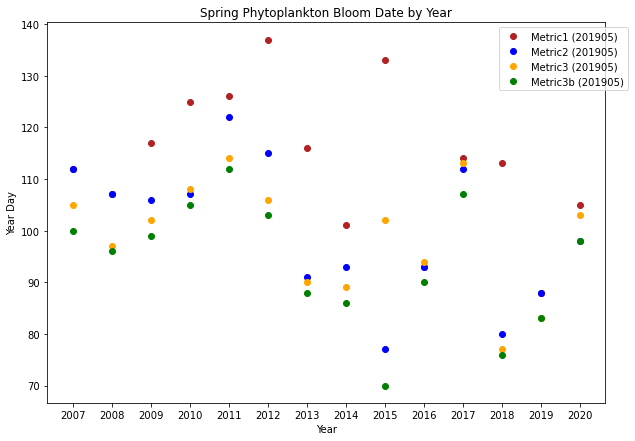

In [86]:
# plot bloomtime for each year: 
fig,ax=plt.subplots(1,1,figsize=(10,7))
p1=ax.plot(years,yearday1, 'o',color='firebrick',label='Metric1 (201905)')
p2=ax.plot(years,yearday2, 'o',color='b',label='Metric2 (201905)')
p3=ax.plot(years,yearday3, 'o',color='orange',label='Metric3 (201905)')
p4=ax.plot(years,yearday3b, 'o',color='g',label='Metric3b (201905)')
ax.set_ylabel('Year Day')
ax.set_xlabel('Year')
ax.set_title('Spring Phytoplankton Bloom Date by Year')
ax.set_xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
ax.legend(handles=[p1[0],p2[0],p3[0],p4[0]],bbox_to_anchor=(1.05, 1.0))

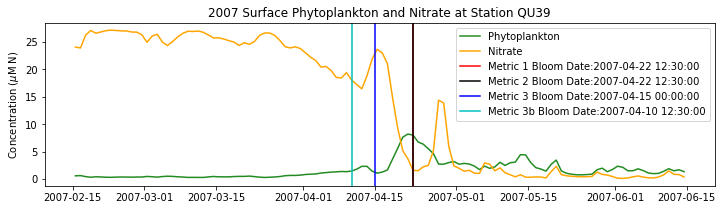

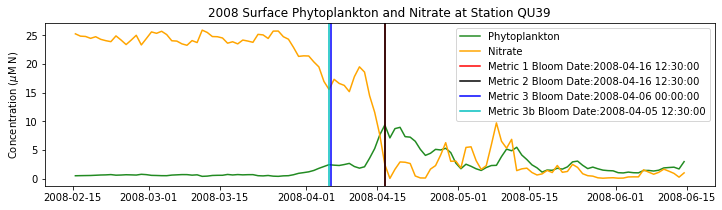

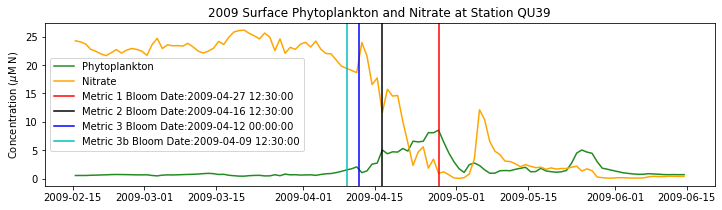

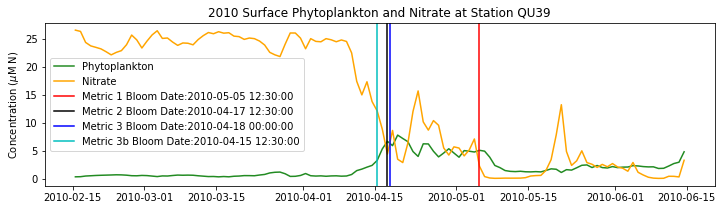

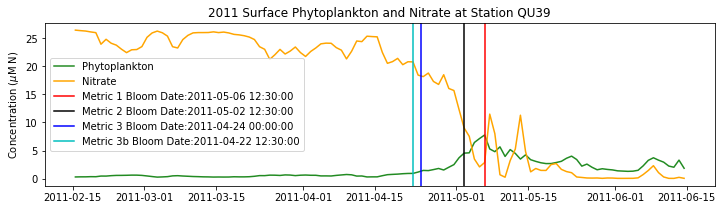

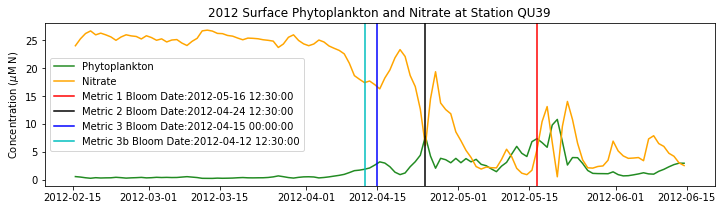

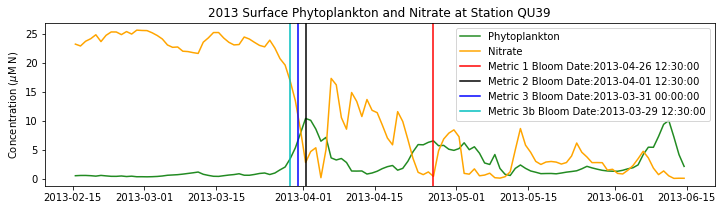

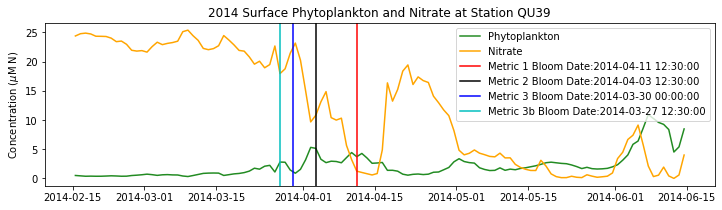

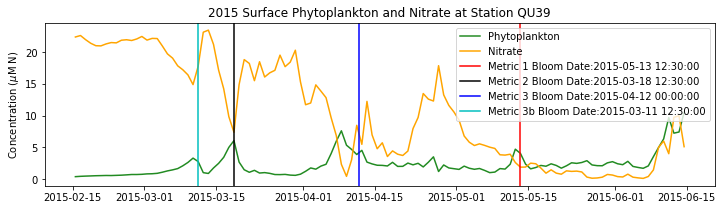

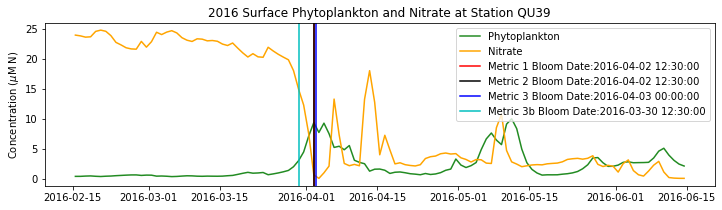

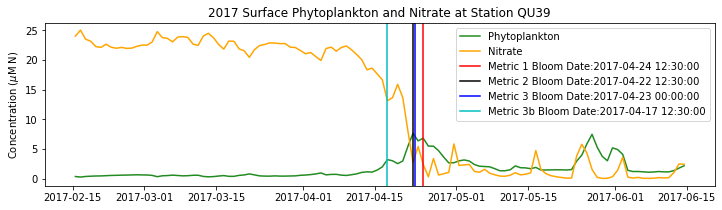

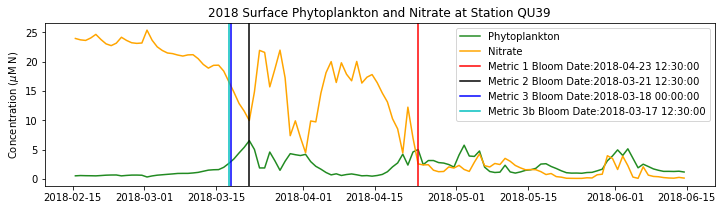

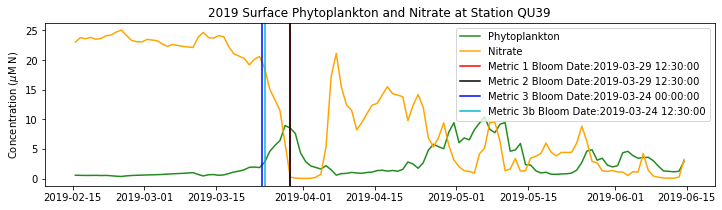

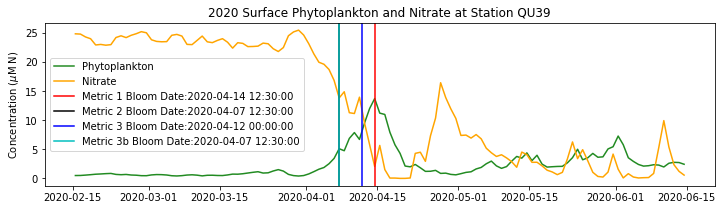

In [90]:
# loop through years of spring time series (mid feb-june) for bloom timing for 201905 run

bloomtime1=list()
bloomtime2=list()
bloomtime3=list()
bloomtime3b=list()
for year in range(startyear,endyear):
    fname3=f'springBloomTime_{str(year)}_{loc}_{modver}.pkl'
    savepath3=os.path.join(savedir,fname3)
    bio_time0,sno30,sdiat0,sflag0,scili0,diat_alld0,no3_alld0,flag_alld0,cili_alld0,phyto_alld0,\
                 intdiat0,intphyto0,fracdiat0,sphyto0,percdiat0=pickle.load(open(savepath3,'rb'))
    # put code that calculates bloom timing here
    bt1=bloomdrivers.metric1_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    bt2=bloomdrivers.metric2_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    bt3=bloomdrivers.metric3_bloomtime(sphyto0,sno30,bio_time0)
    bt3b=metric3b_bloomtime(sphyto0,bio_time0)
    
    # plot time series 
    fig,ax=plt.subplots(1,1,figsize=(12,3))
    p1=ax.plot(bio_time0,sphyto0,
               '-',color='forestgreen',label='Phytoplankton')
    p2=ax.plot(bio_time0,sno30,
               '-',color='orange',label='Nitrate')
    ax.legend(handles=[p1[0],p2[0]],loc=1)
    ax.set_ylabel('Concentration ($\mu$M N)')
    ax.set_title('%i Surface Phytoplankton and Nitrate at Station QU39'%year)

    ax.axvline(x=bt1, label='Metric 1 Bloom Date:{}'.format(bt1), color='r')
    ax.axvline(x=bt2, label='Metric 2 Bloom Date:{}'.format(bt2), color='k')
    ax.axvline(x=bt3, label='Metric 3 Bloom Date:{}'.format(bt3), color='b')
    ax.axvline(x=bt3b, label='Metric 3b Bloom Date:{}'.format(bt3b), color='c')
    ax.legend()

### Conlcusions:
Metric 2 consistently lined up with the visual interpretation of the spring bloom based on phytoplankton concentrations. Therefore, metric 2 will be more heavily considered for correlation analysis.